<a href="https://colab.research.google.com/github/DLPY/Regression/blob/master/Simple_Linear_Regression_(Two_Variables).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Pandas, Pyplot and Read Data



In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV is first read in from a github raw file another option is to import the notebook to your session storage by click on the file icon on left toolbar then importing csv
! wget https://raw.githubusercontent.com/DLPY/Regression/master/Data/Salary.csv

# Once we have the csv file pd.read_csv() converts it to a pandas dataframe
df = pd.read_csv('Salary.csv')



--2021-10-04 15:11:05--  https://raw.githubusercontent.com/DLPY/Regression/master/Data/Salary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417 [text/plain]
Saving to: ‘Salary.csv.1’

Salary.csv.1        100%[===================>]     417  --.-KB/s    in 0s      

2021-10-04 15:11:06 (25.4 MB/s) - ‘Salary.csv.1’ saved [417/417]



## 2. Investigating the Data

In [20]:
# First five columns 
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# check types, nulls and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [21]:
# investigate the variability of the numeric columns
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


## 3. Split the dataset to prepare for training 



In [22]:
# Independent Variable
X = df.drop(['Salary'],axis=1).values

# Depenedent Variable
y = df.Salary.values

# Split Observations in 75% training set 25% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=5)


## 4. Train the model 

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Coefficient and Intercept
print(regressor.coef_)
print(regressor.intercept_)

[8707.44537164]
27787.325187624338


## 5. Predict the test values and Caluclate Error

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict test set from model built during training 
y_pred = regressor.predict(X_test)

# Mean Squared Error Average ((y_pred - y_test)^2)
mse = mean_squared_error(y_pred, y_test)

# Root Mean Squared Error - Root of above
rmse = np.sqrt(mse)

# Print Results
print("Linear Regression MSE: {}".format(mse))
print("Linear Regression RMSE: {}".format(rmse))

Linear Regression MSE: 53111088.89891814
Linear Regression RMSE: 7287.735512415235


# Visualise the Test Set 

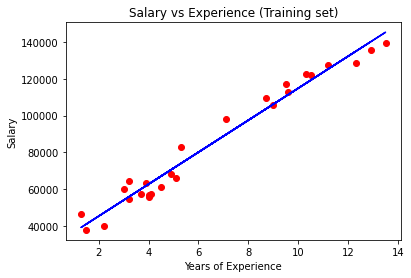

In [26]:
# Plot Real Points
plt.scatter(X_train, y_train, color = 'red')
# Plot Prediciton Line
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualise the test set 

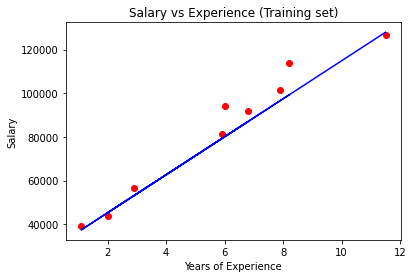

In [27]:
# Plot Real Points
plt.scatter(X_test, y_test, color = 'red')
# Plot Prediction Line
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [58]:
# Set num to number between 0 and 8 to see results
num = 8

print('Years Experience: ', X_test[num][0])
print('Actual Salary: ', y_test[num])
print('Predicted Salary: ', np.round(y_pred)[num])
print('Difference: ', y_test[num] - np.round(y_pred)[num])


Years Experience:  8.2
Actual Salary:  113812
Predicted Salary:  99188.0
Difference:  14624.0
